Model aniqligi: 100.00%


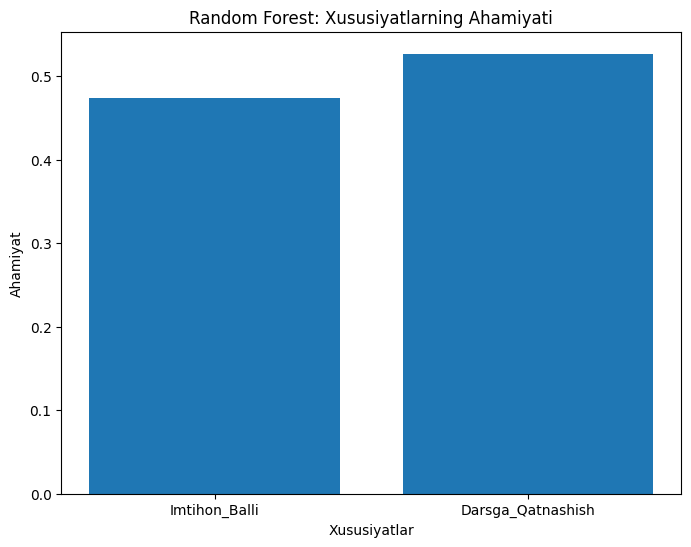

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# O'quvchilar haqidagi ma'lumotlar
data = {
    'Imtihon_Balli': [90, 65, 78, 55, 88, 45, 80, 50],
    'Darsga_Qatnashish': ['Yuqori', 'Past', 'Yuqori', 'Past', 'Yuqori', 'Past', 'Yuqori', 'Past'],
    'O\'qish_Samaradorligi': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 - Yaxshi, 0 - Yomon
}

# DataFrame yaratish
df = pd.DataFrame(data)

# Kategorik o'zgaruvchilarni raqamli shaklga o'tkazish
df['Darsga_Qatnashish'] = df['Darsga_Qatnashish'].map({'Yuqori': 1, 'Past': 0})

# X (input) va y (target) ni ajratish
X = df[['Imtihon_Balli', 'Darsga_Qatnashish']]  # Input (X) - Imtihon balli va darsga qatnashish
y = df['O\'qish_Samaradorligi']  # Target (y) - O'qish samaradorligi (1 yoki 0)

# Ma'lumotlarni o'rgatish va test uchun ajratish (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest modelini yaratish
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Modelni test qilish (prognoz)
y_pred = model.predict(X_test)

# Modelning aniqligini hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f"Model aniqligi: {accuracy * 100:.2f}%")

# Modelni vizualizatsiya qilish
# Feature importance (xususiyatlarning ahamiyati)
importances = model.feature_importances_
features = ['Imtihon_Balli', 'Darsga_Qatnashish']

# Grafikda xususiyatlarning ahamiyatini ko'rsatish
plt.figure(figsize=(8, 6))
plt.bar(features, importances)
plt.title('Random Forest: Xususiyatlarning Ahamiyati')
plt.xlabel('Xususiyatlar')
plt.ylabel('Ahamiyat')
plt.show()
